<p>Inspired and taken from <b><a href="https://statisticsbyjim.com/regression/curve-fitting-linear-nonlinear-regression/"> "Curve Fitting using Linear and Nonlinear Regression" by JIM FROST</a><b> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
plt.style.use('seaborn-whitegrid')

<p>To see non linear regression we will simply take x_train values from 0 to 50 and y values would be the squares of x</p>

In [3]:
df = pd.DataFrame({'x1': np.arange(60), 'target':np.arange(60)**2})
df.head()

,x1,target
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


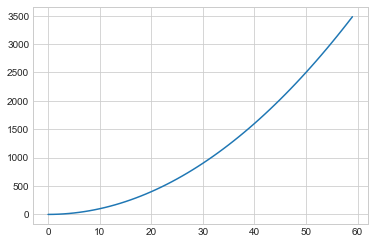

In [4]:
plt.plot(df['x1'], df['target'])
plt.show()

<p>Now lets split the dataset into two parts and fit them different models<p>

In [5]:
x = df['x1'].values.reshape(-1, 1)
y = df['target']

In [6]:
linear_reg = LinearRegression()
linear_reg.fit(x, y)

LinearRegression()

In [7]:
y_pred = pd.Series(linear_reg.predict(x), index=x.flatten())

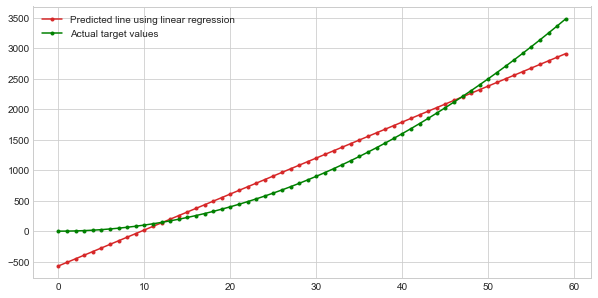

In [8]:
_, ax = plt.subplots(figsize=(10, 5))

ax = y_pred.plot(label='Predicted line using linear regression', color='C3', style='.-')
plt.plot(df['x1'], df['target'], label='Actual target values', color='green', marker='.')

plt.legend()
plt.show()

In [9]:
print(f"The accuracy of linear regression model is {linear_reg.score(x, y)}")

The accuracy of linear regression model is 0.9355682571536077


<h4>The accuracy is showing prettey good but we can clearly see from the plot above that linear line can not predict the target values very well. The model is clearly underfit. Lets plot a residual plot to make things more clear</h4>

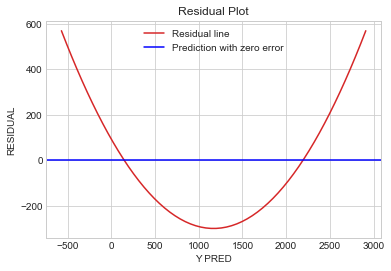

In [10]:
residual = y - y_pred

plt.plot(y_pred, residual, color='C3', label='Residual line')
plt.axhline(color='blue', label='Prediction with zero error')

plt.xlabel('Y PRED')
plt.ylabel("RESIDUAL")
plt.title('Residual Plot')
plt.legend()
plt.show()

<p>The residual plot has a pattern so we can clearly say that the linear model is not a good fit for this data. It capturs some data better than others</p>

<p><b>Tip: </b>
<br>
If we have multiple features for x values and we find through the residual plot(since we can not plot normally with multiple x values we need residuals plot) that the model is not a good fit for the data(residual plot has a pattern) than to find which feature in x values is causing(find curve relation) this we can plot residual plot with respect residual/feature(y axis=residual, x axis=feature) and see if there are any pattern. If there are any patterns than the feature is responsible for the underfit or overfit. Like below</p>

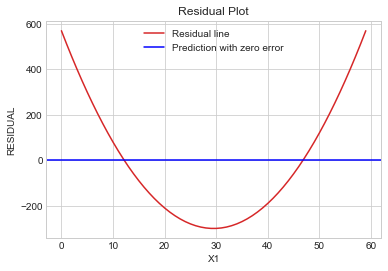

In [11]:
residual = y - y_pred

plt.plot(df['x1'], residual, color='C3', label='Residual line')
plt.axhline(color='blue', label='Prediction with zero error')

plt.xlabel('X1')
plt.ylabel("RESIDUAL")
plt.title('Residual Plot')
plt.legend()
plt.show()

<p>Although the plot looks the same the x axis here is x1. It has a pattern so it means x1 has a curved relation with target value which is actually the case</p>

<p>There are multiple ways to handle situation like this
    <ul>
        <li>Transforming the feature</li>
        <li>Using Non linear Regression Model</li>
    </ul>
</p>

<h4>* Transformation of feature</h4>

<p>Since linear regression assumes that the relation between target variable and feature is linear what we can do is try to make realtion between feature and target linear. To do that we transform the feature or target depending on it's relation with target values. In This case--------</p>

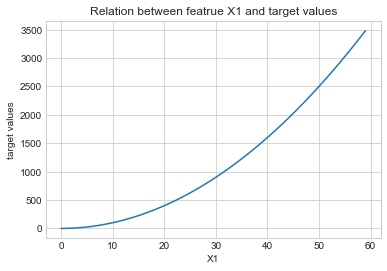

In [12]:
plt.plot(df['x1'], df['target'])

plt.title('Relation between featrue X1 and target values')
plt.xlabel('X1')
plt.ylabel('target values')
plt.show()

<p>We can clearly see that relation between target values and feature x1 is quadtritic. So what we can do is log transform or square root the the target values</p>

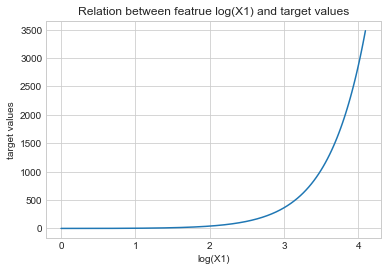

In [13]:
x1 = np.log1p(df['x1'])  #log1p to add 1 to x to avoid error dut log0

plt.plot(x1 , df['target'])

plt.title('Relation between featrue log(X1) and target values')
plt.xlabel('log(X1)')
plt.ylabel('target values')
plt.show()

<p>We can see that the relation between feature x1 and target did not got linear. So we can try to transform the target values</p

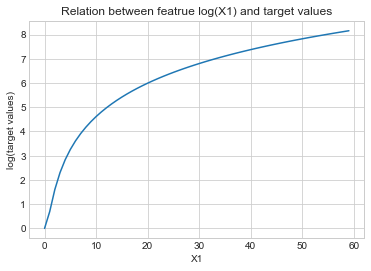

In [14]:
y = np.log1p(df['target'])

plt.plot(df['x1'] , y)

plt.title('Relation between featrue log(X1) and target values')
plt.xlabel('X1')
plt.ylabel('log(target values)')
plt.show()

<p>It still did not work. Lets try to take the square root of the target values</p>

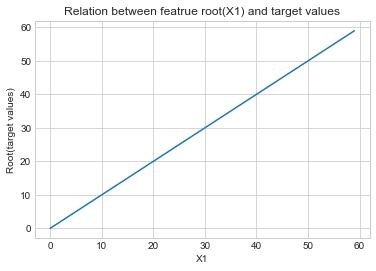

In [15]:
y = np.sqrt(df['target'])

plt.plot(df['x1'] , y)

plt.title('Relation between featrue root(X1) and target values')
plt.xlabel('X1')
plt.ylabel('Root(target values)')
plt.show()

<p>Right now the relation between feature x1 and root of target value is linear. We will use these values to do prediction</p>

In [16]:
x = df['x1'].values.reshape(-1, 1)
y = np.sqrt(df['target'])

linear_trsm_reg = LinearRegression()
linear_trsm_reg.fit(x, y)

LinearRegression()

In [17]:
y_pred = pd.Series(linear_trsm_reg.predict(x), index=x.flatten())

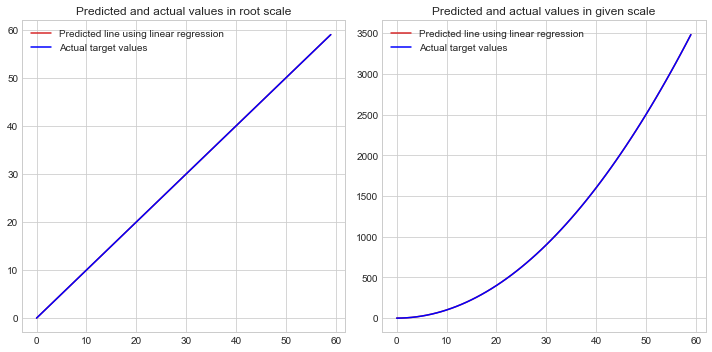

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

y_pred.plot(label='Predicted line using linear regression', color='C3')
plt.plot(x, y, label='Actual target values', color='blue')
plt.title("Predicted and actual values in root scale")

plt.legend()

#since the values are acually not in root form lets transform them back
plt.subplot(1, 2, 2)

y_pred.apply(lambda x: x**2).plot(label='Predicted line using linear regression', color='C3')
plt.plot(x, np.square(y), label='Actual target values', color='blue')
plt.title("Predicted and actual values in given scale")


plt.tight_layout()
plt.legend()
plt.show()

In [19]:
print(f"The accuracy of linear regression model with transformed tragety value is {linear_trsm_reg.score(x, y)}")

The accuracy of linear regression model with transformed tragety value is 1.0


<p>We were able to predict all the values correctly.</p>

<h4>* Using Non linear models</h4>
<p>We can use non linear regression models like random forest regressor or support vector regressor</p>

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [21]:
x = df['x1'].values.reshape(-1, 1)
y = df['target']

random_forest_reg = RandomForestRegressor() # randomforestregressor has a good chance of overfitting
random_forest_reg.fit(x, y)

RandomForestRegressor()

In [22]:
y_pred_rf_reg = pd.Series(random_forest_reg.predict(x), index=x.flatten())

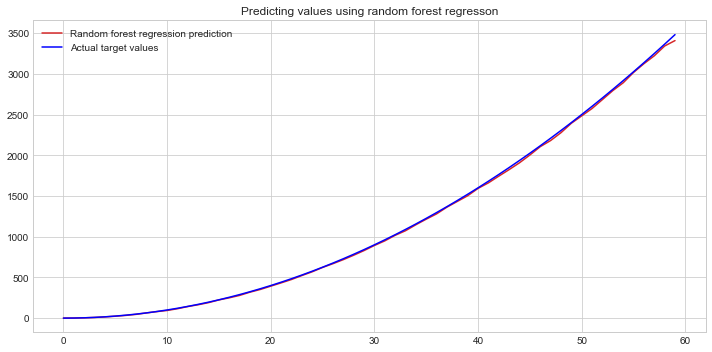

In [23]:
plt.figure(figsize=(10, 5))

y_pred_rf_reg.plot(label='Random forest regression prediction', color='C3')
plt.plot(x, y, label='Actual target values', color='blue')
plt.title("Predicting values using random forest regresson")


plt.tight_layout()
plt.legend()
plt.show()

In [24]:
print(f"The accuracy of non linear regression random forest regression is {random_forest_reg.score(x, y)}")

The accuracy of non linear regression random forest regression is 0.9997562670482134


<h4>For SupportVectorRegression We need to scaled the datas first since svm preforms very pooly without scaled datas</h4

In [25]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x = scaler_x.fit_transform(x)
scaled_y = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [26]:
svr_model = SVR()
svr_model.fit(scaled_x, scaled_y.flatten())

SVR()

In [27]:
pred = svr_model.predict(scaled_x)
y_pred_svr = scaler_y.inverse_transform(pred.reshape(-1, 1)).flatten()

In [28]:
y_pred_svr = pd.Series(y_pred_svr, index=x.flatten())

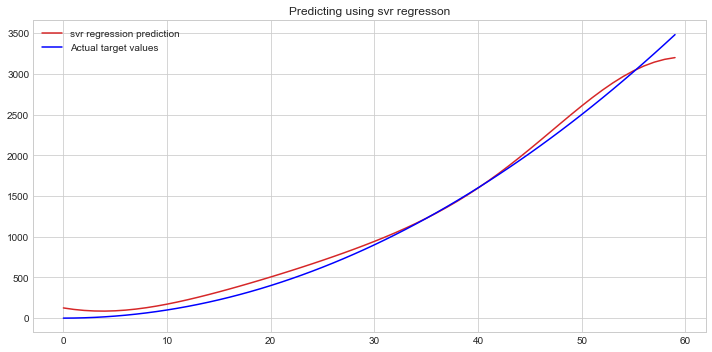

In [29]:
plt.figure(figsize=(10, 5))


y_pred_svr.plot(label='svr regression prediction', color='C3')
plt.plot(x, y, label='Actual target values', color='blue')
plt.title("Predicting using svr regresson")


plt.tight_layout()
plt.legend()
plt.show()

In [30]:
print(f"The accuracy of non linear regression with support vector regression is {svr_model.score(scaled_x, scaled_y)}")

The accuracy of non linear regression with support vector regression is 0.99353290680758


<p>Here we can see that support vector regression was able to fit model pretty well although not as much as random forest regression but it has a less chance of overfitting</p>

<h3>Recriprocical</h3>